# Make table comparing with observations
author: [Mathieu Renzo](mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


In [13]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_30_M2_17_P100_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


In [ ]:
# select profile
profiles = sorted(glob.glob(accretor+'/LOGS/profile*.data'))
ages = np.array([get_age_from_profile(p) for p in profiles], dtype=float)

In [42]:
prof_index = np.argmin(np.absolute(ages-8.5))
print(ages[prof_index])
pfile = profiles[prof_index]

8.500906773005411


(0, 20.068023957296393)

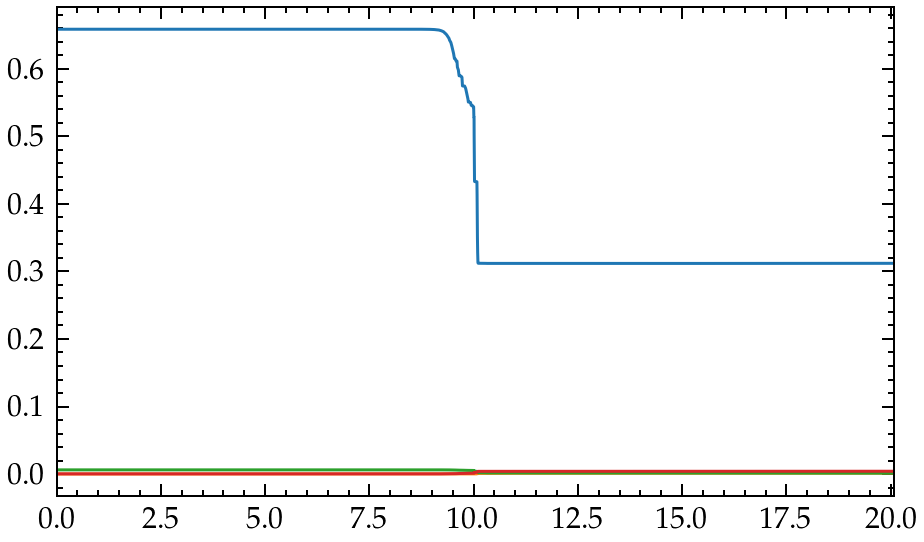

In [43]:
# check abundances profile
src, col = getSrcCol(pfile)
# print(col)
# dq = src[:, col.index('dq')]
mass = src[:, col.index("mass")]
he4 = src[:, col.index('he4')]
c12 = src[:, col.index('c12')]
n14 = src[:, col.index('n14')]
o16 = src[:, col.index('o16')]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
ax.plot(mass, he4, label="he4")
ax.plot(mass, c12, label="c12")
ax.plot(mass, n14, label="n14")
ax.plot(mass, o16, label="o16")
ax.set_xlim(0, max(mass))


In [51]:
# based on the plot above, we can take the value in zone 1 as the surface value
def get_data_from_pfile(pfile):
    src, col = getSrcCol(pfile)
    h1 = src[0, col.index('h1')]
    he4 = src[0, col.index('he4')]
    c12 = src[0, col.index('c12')]
    n14 = src[0, col.index('n14')]
    o16 = src[0, col.index('o16')]
    radius = src[0, col.index("radius")]
    omega =  src[0, col.index("omega")]
    mass = src[0, col.index("mass")]
    vrot = (radius*Rsun_cm/1e5)*omega
    omega = omega*24*60*60
    return(mass, radius, omega, vrot, h1, he4, c12, n14, o16)

In [52]:
def mk_table(pfile, output="../manuscript/table.tex"):
    mass, radius, omega, vrot, h1, he4, c12, n14, o16 = get_data_from_pfile(pfile)
    # define template
    template = r"""
    % this table was automatically generated using the table.ipynb in the repository associated to this manuscript
    % the profile model summarized is from the post-RLOF evolution as single star and is NUMBER.data
    \begin{table*}[hbpt]
        \centering
        \begin{tabular}{c|c|c|c|c|c|c|c|c}
            \hline\hline
            $M \ [M_\odot]$ & $R\ [R_\odot]$ & $ \omega \ [\mathrm{days^{-1}}]$ & $v_\mathrm{rot} \ [\kms] $ & $X(^{1}\mathrm{H})$ & $X(^{4}\mathrm{He})$ & $X(^{12}\mathrm{C})$ & $X(^{14}\mathrm{N})$ & $X(^{16}\mathrm{O})$ \\
            \hline
            MASS & RADIUS & OMEGA & VROT & HYDROGEN & HE & CARBON & NITROGEN & OXYGEN \\
            \hline
        \end{tabular}
        \caption{Surface properties of the accretor close to the present-day HRD position of \zoph,
                corresponding to a physical age of $8.50$\,Myr, shortly after the end of RLOF
                (between the black diamond and the lower $T_\mathrm{eff}$ estimate, third panel of \Figref{fig:D_mix}).}
        \label{tab:surf_prop}
    \end{table*}
    """
    template = template.replace("MASS", f"{mass:.1f}")
    template = template.replace("RADIUS", f"{radius:.1f}")
    template = template.replace("OMEGA", f"{omega:.3f}")
    template = template.replace("VROT", f"{vrot:.1f}")
    template = template.replace("HYDROGEN", f"{h1:.6f}")
    template = template.replace("HE", f"{he4:.6f}")
    template = template.replace("CARBON", f"{c12:.6f}")
    template = template.replace("NITROGEN", f"{n14:.6f}")
    template = template.replace("OXYGEN", f"{o16:.6f}")
    # set profile number
    num = pfile.split('/')[-1].split('.')[0]
    template = template.replace("NUMBER", num)
    print(template, file=open(output, 'w'))
    # show
    print(template)

    
#test
mk_table(pfile)
    


    % this table was automatically generated using the table.ipynb in the repository associated to this manuscript
    % the profile model summarized is from the post-RLOF evolution as single star and is profile496.data
    \begin{table*}[hbpt]
        \centering
        \begin{tabular}{c|c|c|c|c|c|c|c|c}
            \hline\hline
            $M \ [M_\odot]$ & $R\ [R_\odot]$ & $ \omega \ [\mathrm{days^{-1}}]$ & $v_\mathrm{rot} \ [\kms] $ & $X(^{1}\mathrm{H})$ & $X(^{4}\mathrm{He})$ & $X(^{12}\mathrm{C})$ & $X(^{14}\mathrm{N})$ & $X(^{16}\mathrm{O})$ \\
            \hline
            20.1 & 9.8 & 4.575 & 361.4 & 0.678044 & 0.312058 & 0.001339 & 0.001346 & 0.004149 \\
            \hline
        \end{tabular}
        \caption{Surface properties of the accretor close to the present-day HRD position of \zoph,
                corresponding to a physical age of $8.50$\,Myr, shortly after the end of RLOF
                (between the black diamond and the lower $T_\mathrm{eff}$ estimate, third 

In [75]:
print(get_zeta_oph_surface_he(X=0.678044))
# show me some data
print("he4:", f"{get_zeta_oph_surface_he(X=0.678044)[0]:.2f}", "^{+", f"{get_zeta_oph_surface_he(X=0.678044)[1]:.2f}","}", "_{-", f"{get_zeta_oph_surface_he(X=0.678044)[2]:.2f}","}")
print("c12:", f"{get_zeta_oph_surface_c(X=0.678044)[0]:.4f}", "\pm", f"{get_zeta_oph_surface_c(X=0.678044)[1]:.4f}" )
print("n14:", f"{get_zeta_oph_surface_n(X=0.678044)[0]:.3f}", "\pm", f"{get_zeta_oph_surface_n(X=0.678044)[1]:.3f}")
print("o16:", f"{get_zeta_oph_surface_o(X=0.678044)[0]:.3f}", "\pm", f"{get_zeta_oph_surface_o(X=0.678044)[1]:.3f}")
# print("========================2=="2
# print("he4:", get_zeta_oph_surf2ce_2e(X=0.7))
# print("c12:", get_zeta_oph_surf2ce_c(X=0.7))
# print("n14:", get_zeta_oph_surface_n(X=0.7))
# print("o16:", get_zeta_oph_surface_o(X=0.7))




(0.3352127640449438, 0.13726976414616865, 0.05490790565846746)
he4: 0.34 ^{+ 0.14 } _{- 0.05 }
c12: 0.0006 \pm 0.0004
n14: 0.002 \pm 0.001
o16: 0.005 \pm 0.004
